# Genetic Algorithm for solving the p-median problem from the Shell AI Hackathon

1. Problem
2. Algorithm
3. Stop criteria

## 1. Problem Definition

The **capacitated p-median problem** is a well-known optimization problem in operations research. It involves selecting *p* facilities from a set of potential locations to minimize the total distance between the facilities and the demand points (or customers) they serve. The problem is often used in facility location planning, where the goal is to determine the optimal location of facilities such as warehouses, hospitals, or schools to serve a given population. 

The problem is NP-hard, meaning that it is computationally infeasible to solve for large instances using exact methods. Therefore, heuristic and metaheuristic algorithms such as genetic algorithms are often used to find approximate solutions.

![Alt text](image.png)

#### Example:

*Medians* $= \{1,4\}$

Vertex | 1 | 2 | 3 | 4 | 5 | $\dots$ | n-1 | n
--- | --- | --- | --- |--- |--- |--- |--- |---
Median | -1 | 4 | 5 | -1 | 1 | $\dots$ | $m_{n-1}$|$m_n$



In [1]:
from pymoo.core.problem import Problem
from pymoo.problems.single.knapsack import Knapsack
import numpy as np
import pandas as pd

In [2]:
def load_distance_matrix():
    return pd.read_csv('dataset/Distance_Matrix.csv').drop('Unnamed: 0', axis=1)
def load_biomass():
    return pd.read_csv('dataset/Biomass_History.csv')

In [3]:
def cost_of_transportation(x, B, D):
    return np.sum(B @ (D*x))

In [4]:
class P_Median(Problem):
    def __init__(self, B, D, p, C):
        self.D = D
        self.B = B
        self.p = p
        self.C = C
        super().__init__(n_var=p, n_obj=1, n_ieq_constr=3, 
                         n_eq_constr=1, xl=0, xu=1, vtype=bool)

    def _evaluate(self, x, out, *args, **kwargs):
        print(x.shape)
        out["F"] = cost_of_transportation(x, self.B, self.D)

        # constraints
        g1 = np.sum(np.diag(x)) - self.p
        g2 = np.sum(x - x @ np.diag(np.diag(x)))
        g3 = (self.B @ x) - self.C

        out["G"] = np.column_stack([g1, g2, g3])

        h1 = np.sum(x, axis=1) - 1
        out["H"] = h1

In [664]:
import numpy as np
from scipy.stats import norm

# create a prob distribution where the center has the highest prob

def distance_from_center(vertice, center):
    return np.sqrt(np.sum((vertice - center)**2)) + 1


def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def generate_random_matrix(n, p):
    if p > n:
        raise ValueError("p must be less than or equal to n")

    vect_distance_from_center = np.vectorize(distance_from_center)

    # Initialize an n x n matrix filled with zeros
    matrix = np.zeros((n, n), dtype=int)
    prob_dist = 1/vect_distance_from_center(np.arange(n), n//2)
    
    diagonal = sigmoid(prob_dist).astype(int)
    print()
    np.fill_diagonal(matrix, diagonal)
    
    # Set the rest of the elements with uniform prob
    rest_mask = np.logical_not(np.eye(n))
    matrix[rest_mask] = np.random.choice([0, 1], size=rest_mask.sum())
    
    return matrix


In [660]:
# numpy calculate the distance between elements of a matrix
vect_distance_from_center = np.vectorize(distance_from_center)
vect_distance_from_center([6, 5], [10, 10])

array([5., 6.])

In [672]:
generate_random_matrix(17,5)

[0.11111111 0.125      0.14285714 0.16666667 0.2        0.25
 0.33333333 0.5        1.         0.5        0.33333333 0.25
 0.2        0.16666667 0.14285714 0.125      0.11111111]


array([[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,

In [573]:
n= 4
rnd = np.random.rand(n)
dist = norm.pdf(np.arange(n), loc=n//2, scale=n/6) * 2
print(list(zip(dist, rnd)))
print(dist > rnd)

[(0.013295545235814023, 0.8244196495193659), (0.38855278699767526, 0.28231580170936976), (1.1968268412042982, 0.7882462111832169), (0.38855278699767526, 0.4992501959691181)]
[False  True  True False]


Experimental p: 19.3345


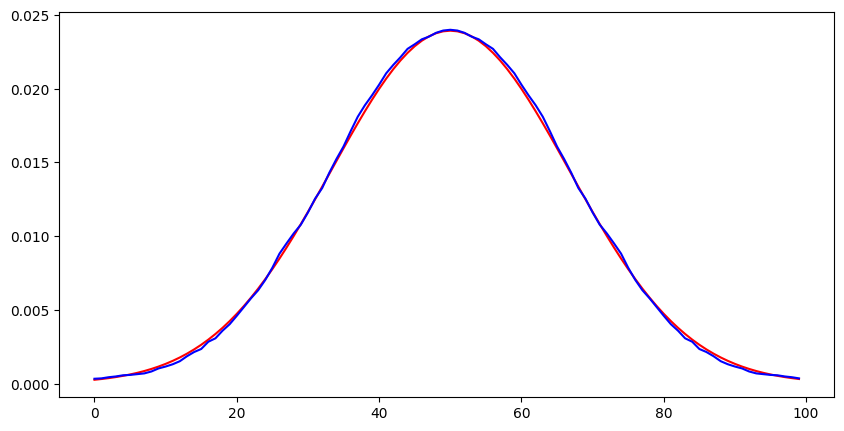

In [583]:
# proof test of the generate_random_matrix function
n = 100
p = 2

indices_appereances = np.zeros(n)
sum_exp_p = 0
for _ in range(20_000):
    matrix = generate_random_matrix(n, p)
    
    # Check the distribution of the diagonal
    diagonal = np.diag(matrix)
    diag_mask = diagonal == 1
    indices_appereances[diag_mask] += 1

    experimental_p = diagonal.sum()
    sum_exp_p += experimental_p

print(f"Experimental p: {sum_exp_p / 2_000}")

# plot the normal distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(norm.pdf(np.arange(n), loc=n//2, scale=n/6), c='r')
plt.plot(indices_appereances / indices_appereances.sum(), c='b')
plt.show()

In [407]:
n=5
sigmoid(np.random.normal(loc=n/2, scale=n/8, size=n))

array([0.92590355, 0.93230432, 0.96208991, 0.76987921, 0.90586622])

In [467]:
n =5

matrix = np.zeros((n, n), dtype=int)
distribution = np.random.normal(loc=n/2, scale=.125*n, size=n)
diagonal = np.random.choice([0, 1], size=n, )

ValueError: 'a' and 'p' must have same size

In [ ]:
np.random.normal()

In [466]:
generate_random_matrix(5,2)

[0.50021413 0.53583125 0.96350648 0.96350648 0.53583125]


array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [140]:
# Define n and p
n = 5
p = 2

vectorized_generate_random_matrix = np.vectorize(generate_random_matrix, signature='(),()->(n,m)')
result_array = vectorized_generate_random_matrix(np.full(10000, 10), np.full(10000, 3))
result_array


array([[[0, 1, 0, ..., 0, 1, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [0, 0, 1, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 0]],

       [[0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 1, 1],
        [0, 0, 1, ..., 0, 1, 1],
        ...,
        [0, 1, 0, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 1, 0],
        [0, 1, 1, ..., 1, 0, 0]],

       [[0, 0, 1, ..., 1, 0, 0],
        [0, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [0, 0, 1, ..., 1, 0, 1],
        [0, 1, 0, ..., 0, 1, 1]],

       ...,

       [[0, 0, 0, ..., 0, 1, 1],
        [0, 0, 1, ..., 0, 1, 1],
        [0, 1, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 1, 0, 1],
        [1, 1, 0, ..., 0, 0, 1],
        [1, 1, 0, ..., 1, 1, 0]],

       [[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 

In [26]:
vect = np.vectorize(generate_random_matrix)
vect((6,2), (4,))


ValueError: setting an array element with a sequence.

In [7]:
import numpy as np
from pymoo.core.sampling import Sampling

class P_MedianSampling(Sampling):

    def _do(self, problem, n_samples, **kwargs):
        n = len(problem.B)
        data = np.zeros((n_samples, n, n), dtype=int)
        for i in range(n_samples):
            data[i] = generate_random_matrix(n, problem.p)
        return data


In [11]:
import numpy as np

# Define your function
def my_function(x, y):
    return x + y

# Define the shape of the array you want
shape = (3, 3)  # For example, a 3x3 array

# Repeat the function n times
n = 4
result = np.fromfunction(np.vectorize(lambda x, y: my_function(x, y)), shape=shape)
result = np.tile(result, (n, n))

print(result)


[[0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [2. 3. 4. 2. 3. 4. 2. 3. 4. 2. 3. 4.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [2. 3. 4. 2. 3. 4. 2. 3. 4. 2. 3. 4.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [2. 3. 4. 2. 3. 4. 2. 3. 4. 2. 3. 4.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [2. 3. 4. 2. 3. 4. 2. 3. 4. 2. 3. 4.]]


In [9]:
# D is a distance matrix
# B is a demand matrix

medians = np.array([0])

D = np.array([[0, 1, 2], 
              [1, 0, 3], 
              [2, 3, 0]])

B = np.array([2, 2, 3])

x = np.array([[1, 0, 0], 
              [1, 0, 0], 
              [1, 0, 0]])

In [10]:
ex = P_MedianSampling()
ex._do(P_Median(B, D, 2, 10), 10)

array([[[0, 0, 1],
        [0, 1, 1],
        [1, 1, 1]],

       [[0, 1, 0],
        [1, 1, 0],
        [0, 0, 1]],

       [[0, 1, 0],
        [1, 1, 0],
        [0, 0, 1]],

       [[1, 0, 1],
        [0, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 1, 1],
        [0, 1, 1]],

       [[0, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 1, 1],
        [0, 1, 1]],

       [[1, 1, 1],
        [1, 1, 0],
        [1, 0, 1]],

       [[1, 1, 0],
        [1, 0, 0],
        [0, 0, 1]],

       [[0, 1, 0],
        [1, 1, 0],
        [0, 0, 1]]])

In [230]:
from pymoo.core.duplicate import ElementwiseDuplicateElimination


class MyElementwiseDuplicateElimination(ElementwiseDuplicateElimination):

    def is_equal(self, a, b):
        return a.get("hash") == b.get("hash")

In [ ]:
from pymoo.algorithms.soo.nonconvex.brkga import BRKGA
from pymoo.optimize import minimize

problem = P_Median(B, D, 2, 10)

algorithm = BRKGA(
    n_elites=200,
    n_offsprings=700,
    n_mutants=100,
    bias=0.7,
    eliminate_duplicates=MyElementwiseDuplicateElimination())


res = minimize(problem,
               algorithm,
               ("n_gen", 75),
               seed=1,
               verbose=True)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))
print("Solution", res.opt.get("pheno")[0])